In [1]:
#Import required Libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cx_Oracle 
import gzip
import pickle
from datetime import datetime, timedelta

In [2]:
conn = cx_Oracle.connect('ReportUser/report@10.10.1.7:1521/rproods')
cur = conn.cursor()

In [3]:
q = "select i.invc_sid, i.sbs_no, i.store_no, i.invc_type, i.created_date, i.post_date, s.store_name  from invoice_v i left join store s on i.sbs_no+i.store_no = s.sbs_no+s.store_no "

In [4]:
cur.execute(q)
j = cur.fetchmany(500)

In [5]:
col = ['Invc_sid', 'sub', 'store', 'invc_type', 'created_date', 'post_date','stores']

In [6]:
data  = pd.DataFrame(j, columns=col)

In [7]:
data

,Invc_sid,sub,store,invc_type,created_date,post_date,stores
0,-2362243293093058704,200,14,0,2001-12-03 13:26:36,2014-12-05 11:29:26,CasaBella Ibadan Mall
1,-2235808599907283234,200,4,0,2010-08-04 13:09:43,2015-01-08 13:11:35,CasaBella Ikeja City Mall
2,-1460234775758571586,200,14,0,2013-07-25 13:11:58,2015-07-31 13:18:48,CasaBella Ibadan Mall
3,-2365282266071238215,200,9,0,2014-02-02 15:47:19,2014-12-04 15:52:28,CasaBella CocoaMall
4,-2112739872941416813,200,5,0,2014-10-10 17:06:40,2015-02-10 17:11:38,CasaBella ApoMall
...,...,...,...,...,...,...,...
495,-2264761994308850399,200,3,0,2014-12-01 17:54:19,2014-12-31 17:57:08,CasaBella Surulere
496,-2365219618848682328,200,14,0,2014-12-01 17:54:38,2014-12-04 16:15:35,CasaBella Ibadan Mall
497,-2264754674924163708,200,3,0,2014-12-01 17:57:10,2014-12-31 17:58:44,CasaBella Surulere
498,-2264750557024022782,200,3,0,2014-12-01 17:58:46,2014-12-31 18:00:49,CasaBella Surulere


In [8]:
trans_count =  data.groupby('stores').count()

In [9]:
trans_count

,Invc_sid,sub,store,invc_type,created_date,post_date
stores,,,,,,
CasaBella Ado Bayero,28,28,28,28,28,28
CasaBella Apapa,1,1,1,1,1,1
CasaBella ApoMall,59,59,59,59,59,59
CasaBella CocoaMall,43,43,43,43,43,43
CasaBella Ibadan Mall,35,35,35,35,35,35
CasaBella Ikeja City Mall,5,5,5,5,5,5
CasaBella Ikota,36,36,36,36,36,36
CasaBella Palms,78,78,78,78,78,78
CasaBella Polo Park,62,62,62,62,62,62


In [18]:
trans_count.get_group('CasaBella Surulere')

,Invc_sid,sub,store,invc_type,created_date,post_date,stores
45,-2343541967602987851,200,3,0,2014-12-01 12:23:40,2014-12-10 12:44:36,CasaBella Surulere
57,-2343487952227011996,200,3,0,2014-12-01 12:44:38,2014-12-10 12:54:00,CasaBella Surulere
64,-2343463728963769524,200,3,0,2014-12-01 12:54:02,2014-12-10 12:59:23,CasaBella Surulere
67,-2343449875832975884,200,3,0,2014-12-01 12:59:24,2014-12-10 13:02:54,CasaBella Surulere
72,-2343440807758314869,200,3,0,2014-12-01 13:02:55,2014-12-10 13:05:48,CasaBella Surulere
...,...,...,...,...,...,...,...
488,-2264775564580524607,200,3,0,2014-12-01 17:49:03,2014-12-31 17:52:26,CasaBella Surulere
493,-2264766812662161196,200,3,0,2014-12-01 17:52:27,2014-12-31 17:54:18,CasaBella Surulere
495,-2264761994308850399,200,3,0,2014-12-01 17:54:19,2014-12-31 17:57:08,CasaBella Surulere
497,-2264754674924163708,200,3,0,2014-12-01 17:57:10,2014-12-31 17:58:44,CasaBella Surulere


In [13]:
d = [('1/08/2019','31/08/2019',100 ), ('1/08/2019','31/08/2019',200 ),
     ('1/09/2019','30/09/2019',100 ), ('1/09/2019','30/09/2019',200 ),
    ('1/10/2019','31/10/2019',100 ), ('1/10/2019','31/10/2019',200 ),
    ('1/11/2019','30/11/2019',100 ), ('1/11/2019','30/11/2019',200 ),
    ('1/12/2019','31/12/2019',100 ), ('1/12/2019','31/12/2019',200 )]

In [5]:
d = [('2/02/2020','8/02/2020',100 ), ('2/02/2019','8/02/2019',200 )]

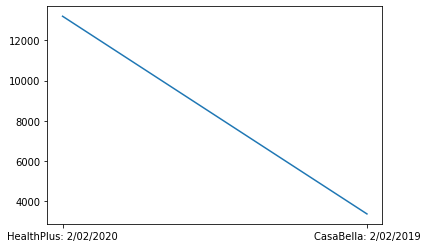

In [6]:
d = [('2/02/2020','8/02/2020',100 ), ('2/02/2019','8/02/2019',200 )]
counts = {}
for i in d:
    query = "select count(invc_sid) as trans_count from invoice_v where sbs_no={} and invc_type=0 and created_date between to_date('{}', 'DD/MM/YYYY') AND to_date('{}', 'DD/MM/YYYY')".format(i[2], i[0], i[1])
    cur.execute(query)
    count =  cur.fetchone()
    sub = "HealthPlus" if i[2] == 100 else "CasaBella"
    
    dates = sub + ': ' + i[0]+' - '+ i[1]
    counts.update({dates: count})
     
x = list(counts.values())
x = [i[0] for i in x]
y =  list(counts.keys())
y = [i.split('-')[0] for i in y]
y = [i.rstrip() for i in y]
plt.plot(y, x)
plt.xlabel = "Week"
plt.ylable = "Trans Coutn"

    

In [7]:
counts

{'HealthPlus: 2/02/2020 - 8/02/2020': (13203,),
 'CasaBella: 2/02/2019 - 8/02/2019': (3364,)}

In [72]:
y =  counts.keys()

In [83]:
y = ['05/01/2020', '06/01/2020', '19/01/2020', '26/01/2020']

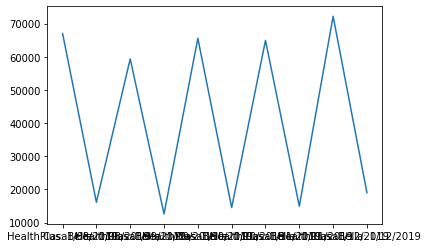

In [16]:
plt.plot(y, x)
plt.xlabel = "Week"
plt.ylable = "Trans Coutn"